In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

In [2]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


Data files preprocessed ...

28 inputs constructed for training ...

0m 9s (- 3m 45s) (60 4%) 3.7147
0m 18s (- 3m 36s) (120 8%) 3.3209
0m 29s (- 3m 33s) (180 12%) 3.4859
0m 39s (- 3m 26s) (240 16%) 3.2513
0m 50s (- 3m 20s) (300 20%) 3.2780
1m 0s (- 3m 12s) (360 24%) 3.0433
1m 16s (- 3m 15s) (420 28%) 2.9222
1m 28s (- 3m 8s) (480 32%) 3.2093
1m 40s (- 2m 58s) (540 36%) 3.0006
1m 51s (- 2m 47s) (600 40%) 3.1120
2m 1s (- 2m 35s) (660 44%) 2.9778
2m 12s (- 2m 23s) (720 48%) 2.8573
2m 23s (- 2m 12s) (780 52%) 2.8940
2m 35s (- 2m 1s) (840 56%) 2.6324
2m 47s (- 1m 51s) (900 60%) 2.1965
2m 59s (- 1m 40s) (960 64%) 2.8423
3m 11s (- 1m 29s) (1020 68%) 2.3934
3m 21s (- 1m 18s) (1080 72%) 2.1131
3m 31s (- 1m 6s) (1140 76%) 1.7830
3m 40s (- 0m 55s) (1200 80%) 2.0521
3m 50s (- 0m 43s) (1260 84%) 2.1199
4m 0s (- 0m 32s) (1320 88%) 1.7165
4m 11s (- 0m 21s) (1380 92%) 1.4264
4m 22s (- 0m 10s) (1440 96%) 1.2008
4m 33s (- 0m 0s) (1500 100%) 0.8639
Training finished ...



<Figure size 432x288 with 0 Axes>

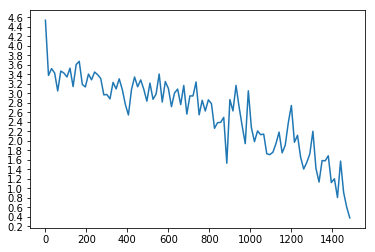

Losses diagram saved in TODO
Models saved in TODO

28 inputs constructed for testing ...

28 outputs predicted ...

Predictions written to ../output/toy.preprocessed-test.predicted.postprocessed.en
Blue score written to ../output/toy.preprocessed-test.BLEU


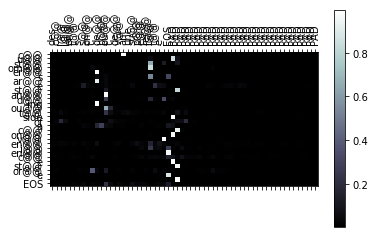

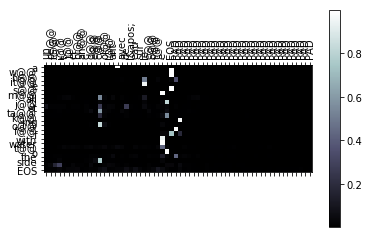

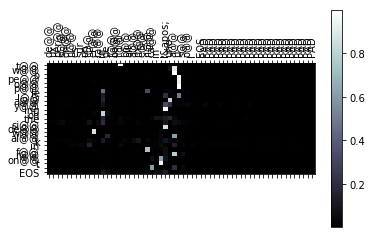

Attention diagrams saved in TODO


In [3]:
#### TOY DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 1500
max_hours = 9

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 80, vocab_threshold = 1,
    padding = False)


Data files preprocessed ...

10853 inputs constructed for training ...

2m 57s (- 71m 10s) (3000 4%) 3.0280
5m 45s (- 66m 13s) (6000 8%) 2.7334
8m 30s (- 62m 24s) (9000 12%) 2.6248
11m 17s (- 59m 15s) (12000 16%) 2.4770
14m 2s (- 56m 10s) (15000 20%) 2.3690
16m 53s (- 53m 29s) (18000 24%) 2.2467
19m 48s (- 50m 56s) (21000 28%) 2.1711
22m 32s (- 47m 53s) (24000 32%) 2.1821
25m 13s (- 44m 50s) (27000 36%) 2.0239
27m 59s (- 41m 59s) (30000 40%) 1.9909
30m 49s (- 39m 13s) (33000 44%) 1.9521
33m 30s (- 36m 18s) (36000 48%) 1.9545
36m 13s (- 33m 26s) (39000 52%) 1.9019
39m 2s (- 30m 40s) (42000 56%) 1.8809
41m 53s (- 27m 55s) (45000 60%) 1.9261
44m 45s (- 25m 10s) (48000 64%) 1.9475
47m 32s (- 22m 22s) (51000 68%) 1.9020
50m 18s (- 19m 34s) (54000 72%) 1.8985
53m 7s (- 16m 46s) (57000 76%) 1.9190
55m 47s (- 13m 56s) (60000 80%) 1.8747
58m 18s (- 11m 6s) (63000 84%) 1.9494
61m 4s (- 8m 19s) (66000 88%) 1.9535
63m 33s (- 5m 31s) (69000 92%) 1.9460
66m 25s (- 2m 46s) (72000 96%) 2.0053
68m 57s 

<Figure size 432x288 with 0 Axes>

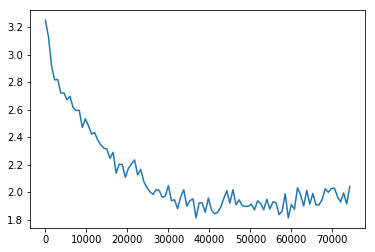

Losses diagram saved in TODO
Models saved in TODO

10853 inputs constructed for testing ...

10853 outputs predicted ...

Predictions written to ../output/tutorial.preprocessed-test.predicted.postprocessed.en
Blue score written to ../output/tutorial.preprocessed-test.BLEU


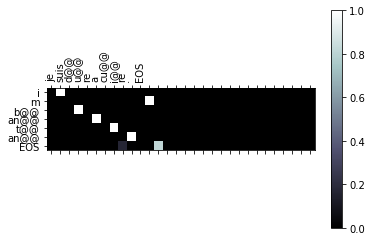

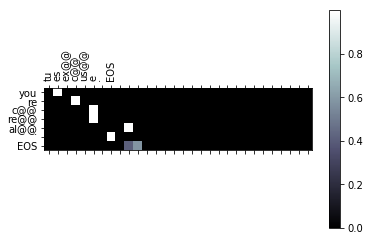

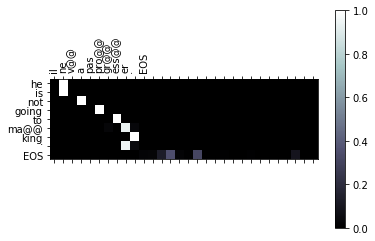

Attention diagrams saved in TODO


In [4]:
#### TUTORIAL DATA

hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 9


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = False, 
    use_bpe = True, num_operations = 200, vocab_threshold = 2,
    padding = False)


In [ ]:
#### TRAIN and TEST DATA

hidden_size = 512 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 80000
max_hours = 8

MAX_LENGTH = 25
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_sentence_length = MAX_LENGTH, 
    replace_unknown_words = True, 
    use_bpe = True, num_operations = 400, vocab_threshold = 5, 
    padding = False)


Data files preprocessed ...

28319 inputs constructed for training ...

